# Миронова Елена, РИМ-181226
# 4. Фильтрация изображений
## 4.1 Операция свертки. Линейные фильтры


### 4.1.1. Свертка
Выполните свертку изображения
\begin{bmatrix}
0 & -8 & -3 & -2\\
1 & 9 & -8 & 0\\
9 & -4 & 5 & -9\\
6 & -4 & 6 & 3
\end{bmatrix}
с ядром
\begin{bmatrix}
4 & -5 & 4 \\
-6 & -8 & -2\\
1 & 5 & 5
\end{bmatrix}
Результат выпишите построчно через пробел.

In [1]:
import numpy as np
from skimage.io import imread, imshow, imsave
from skimage.color import rgb2gray
from skimage.transform import integrate, integral_image
from skimage import img_as_ubyte
from scipy.signal import convolve2d
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
image = np.array([[0, -8, -3, -2], 
                [1, 9, -8, 0], 
                [9, -4, 5, -9], 
                [6, -4, 6, 3]])

kernel = np.array([[4, -5, 4], 
                   [-6, -8, -2], 
                   [1, 5, 5]])

print(convolve2d(kernel, image, mode='valid'))

[[  7 -88]
 [ 94  -7]]


### 4.1.2. Box-фильтр.

Реализуйте box-фильтрацию изображения окном 5×5 пикселей. Дополнять изображение не нужно (т.е. изображение после фильтрации уменьшится). 

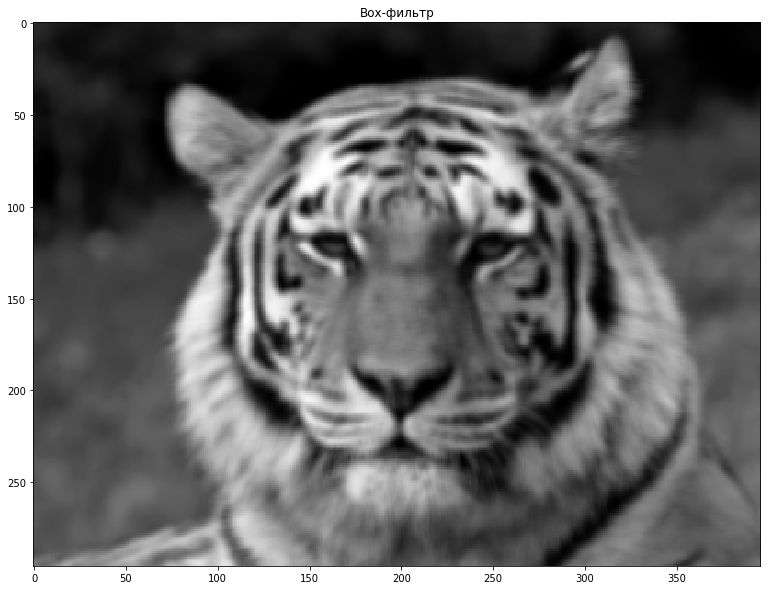

In [20]:
img = imread('https://stepik.org/media/attachments/lesson/61037/tiger-gray-small.png')
img2 = imread("https://stepik.org/media/attachments/lesson/61037/box-tiger.png")
img = integral_image(img)*4
n = img.shape[0]-4
m = img.shape[1]-4
img_box = np.zeros([n,m],np.uint32)

for i in range(n):
    for j in range(m):
        img_box[i,j]=integrate(img,(i,j),(i+4,j+4))
img_box=np.uint8(img_box//100)
#imsave('out_img.png',img_box)
plt.figure(figsize=(15,10))
plt.set_cmap(cmap="gray")#иначе тигр в других цветах, но сравнение с результатом в любом случае дают true 
plt.title("Box-фильтр")
plt.imshow(img_box)
plt.show()

In [4]:
np.array_equal(img2, img_box)

True

### 4.1.3. Размер гауссовского фильтра
Какого размера (K) должен быть гауссовский фильтр для 𝜎=4?

`4*2*3+1 = 25`
### 4.1.4. Подсчет функции Гаусса
На вход подаются три числа: 𝜎, 𝑥, 𝑦. Подсчитайте значение функции Гаусса в этой точке. Формула для функции Гаусса: \begin{equation*}G_{\sigma}(x, y) = \frac{1}{2\pi\sigma^2}e^{\frac{-x^2-y^2}{2\sigma^2}}\end{equation*}

In [5]:
def gauss(sigma, x, y):
    return 1/((2*np.pi)*sigma**2)*np.e**((-x**2 - y**2)/(2*sigma**2))
sigma, x, y = [1, 1, 1]
gauss(sigma, x, y)

0.05854983152431917

### 4.1.5. Ядро гауссовского фильтра

На стандартный вход подается параметр `𝜎` гауссовского фильтра. Подсчитайте и напечатайте на стандартый вывод элементы ядра. Для подсчета значений функции Гаусса используйте функцию из предыдущего задания. `𝜎` может быть нецелым, тогда округлите `𝐾` с помощью функции `round`. Элементы ядра выводите с 5 цифрами после запятой.

In [6]:
def g_k(sigma):
    k = round(3*sigma)
    kernel = [[gauss(sigma, x, y) for x in range(-k, k+1)] for y in range(-k, k+1)]
    kernel = np.array(kernel)
    norm_kernel = kernel / np.sum(kernel, axis=(0,1))
    return norm_kernel

In [7]:
kernel = g_k(0.33)
print('\n'.join([' '.join(['{:.5f}'.format(item) for item in row]) for row in kernel]))

0.00010 0.00974 0.00010
0.00974 0.96065 0.00974
0.00010 0.00974 0.00010


### 4.1.6. Гауссовская фильтрация.

Профильтруйте изображение гауссовским ядром с `𝜎=0.66`. Для подсчета ядра используйте функцию из предыдущего задания. При подсчете новых значений изображения не забывайте обрезать их с помощью `numpy.clip`. Дополнять изображение не нужно (т.е. изображение после фильтрации уменьшится).

In [30]:
img = imread("https://stepik.org/media/attachments/lesson/61037/tiger-gray-small.png")
img2 = imread("https://stepik.org/media/attachments/lesson/61037/gaussian-tiger.png")
sigma = 0.66
kernel = g_k(sigma)
img = convolve2d(img, kernel, mode='valid').astype('uint8')

In [31]:
np.array_equal(img2, img)

True

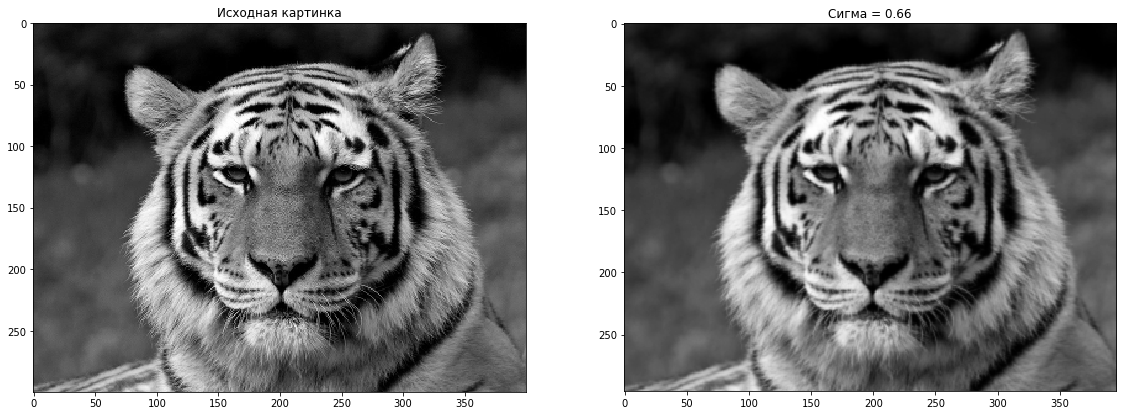

In [32]:
img = imread("https://stepik.org/media/attachments/lesson/61037/tiger-gray-small.png")
img3 = convolve2d(img, g_k(0.66), mode='valid').astype('uint8')
plt.figure(figsize=(30,20))
#источник
plt.subplot(1,3,1)
plt.title("Исходная картинка")
plt.imshow(img)
#сигма 0,66
plt.subplot(1,3,2)
plt.title("Сигма = 0.66")
plt.imshow(img3)

### 4.1.7 Повышение резкости изображения.
Реализуйте повышение четкости изображения путём фильтрации изображения с ядром
\begin{equation*}\frac{1}{10}
\begin{bmatrix}
-1 & -2 & -1 \\
-2 & 22 & -2 \\
-1 & -2 & -1
\end{bmatrix}\end{equation*}
При подсчете новых значений изображения не забывайте обрезать их с помощью `numpy.clip`. Дополнять изображение не нужно (т.е. изображение после фильтрации уменьшится).

In [26]:
img = imread('https://stepik.org/media/attachments/lesson/61037/tiger-gray-small.png')
img2 = imread('https://stepik.org/media/attachments/lesson/61037/unsharp-tiger.png')

In [27]:
def rezk(img):
    res = np.array([[[0] * img.shape[1]] * img.shape[0]], dtype='float')[0]

    kernel = np.array([[-1, -2, -1],
                       [-2, 22, -2],
                       [-1, -2, -1]]) / 10
    for i in range(3, img.shape[0] + 1):
        for j in range(3, img.shape[1] + 1):
            res[i - 3, j - 3] = (img[i-3: i, j-3: j] * kernel).sum()


    res = np.clip(res[: - 2, : - 2], 0, 255).astype('uint8')
    return res

In [28]:
img = rezk(img)
np.array_equal(img2, img)

True

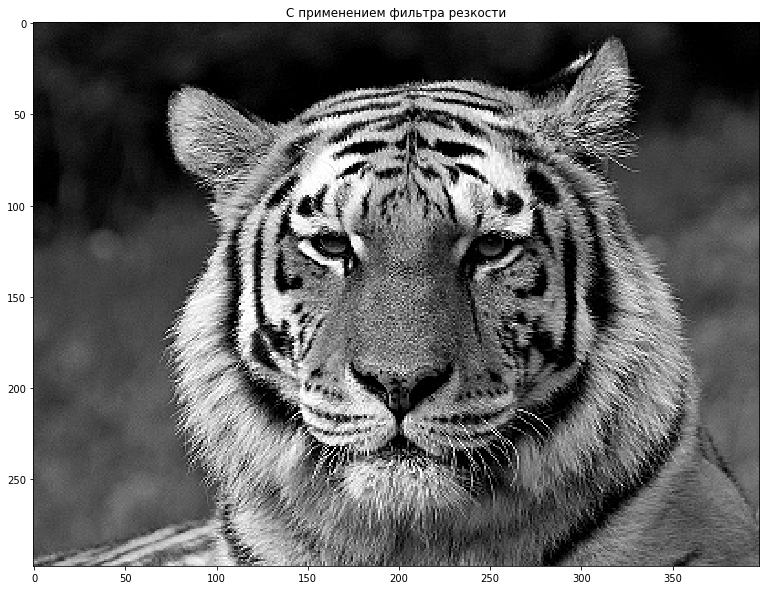

In [29]:
plt.figure(figsize=(15,10))
plt.title("С применением фильтра резкости")
plt.imshow(img)
plt.show()

## 4.2 Медианный фильтр
### 4.2.1. Медианный фильтр
Реализуйте медианную фильтрацию изображения окном 7×7 пикселей. Дополнять изображение не нужно (т.е. изображение после фильтрации уменьшится). 

In [21]:
img = imread('https://stepik.org/media/attachments/lesson/61041/tiger-gray-small.png')
img2 = imread('https://stepik.org/media/attachments/lesson/61041/median-tiger.png')

In [22]:
def m_f(img, size):
    res = img.copy()
    rows,cols = img.shape
    half = size//2 #для 7 пикселей — 3

    for i in range(half,rows-half):
        for j in range(half,cols-half):
            # 7х7
            a = img[i-half:i+half+1,j-half:j+half+1]
            m = np.median(a)
            res[i][j] = m

    res = res[half:rows-half,half:cols-half]
    return res

In [23]:
img = m_f(img, 7)

In [24]:
np.array_equal(img2, img)

True

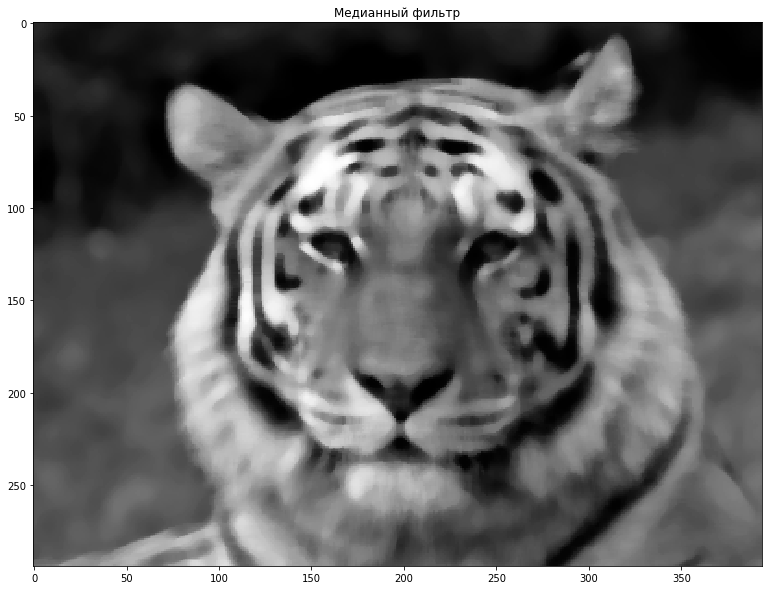

In [25]:
plt.figure(figsize=(15,10))
plt.title("Медианный фильтр")
plt.imshow(img)
plt.show()

### 4.2.2. Медианный фильтр
Предположим, что мы хотим профильтровать изображение размером 600 строк и 800 столбцов с помощью алгоритма быстрой медианной фильтрации окном размера 7x7 пикселей. Будем накладывать окно так, чтобы оно не выходило за границы изображения (т.е. в результате фильтрации изображение уменьшится).

Сколько раз алгоритму потребуется инициализировать гистограмму H?
`594`

### 4.2.3. Медианный фильтр
Сколько раз алгоритму потребуется обновить гистограмму H (т.е. сдвинуть окно на 1 пиксель вправо)?
`471042`